In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA, FastICA, FactorAnalysis
from sklearn.random_projection import GaussianRandomProjection

In [80]:
k_clst_wine = 6
k_clst_pima = 2

colors_wine = ['red','green','blue','purple', 'pink', 'yellow']
colors_pima = ['red','green']

def plot2D_clusters(data_2Dreduced, pima_Y, wine_Y, colors):

    fig = plt.figure(figsize = (15,4))
    ax = fig.add_subplot(1,2,1)
    ax.scatter(data_2Dreduced.c1, data_2Dreduced.c2,
               c=pima_Y, cmap=matplotlib.colors.ListedColormap(colors))
    ax.set_xlabel('c1')
    ax.set_ylabel('c2')

    bx = fig.add_subplot(1,2,2)
    bx.scatter(data_2Dreduced.c1, data_2Dreduced.c2,
               c=wine_Y, cmap=matplotlib.colors.ListedColormap(colors))
    bx.set_xlabel('c1')
    bx.set_ylabel('c2')
    return ax, bx

In [149]:
# pre-processing - Standard scaling on all data 
pima = pd.read_csv('./data/Pima.csv').sample(frac = 1) # shuffle pima
assert pima.isnull().sum().sum() == 0
pima_X, pima_Y = StandardScaler(with_std=False).fit_transform(pima.iloc[:,0:-1]), pima.iloc[:, -1]
pima_Y = pd.Series([1 if label == 2 else 0 for label in pima_Y], name = pima_Y.name) # 0 and 1
m_pima, n_pima = pima_X.shape

##########################################

wine = pd.read_csv('./data/winequality-red.csv',sep =";").sample(frac = 1) # shuffle wine
assert wine.isnull().sum().sum() == 0
wine_X, wine_Y = StandardScaler().fit_transform(wine.iloc[:, 0:-1]), wine.iloc[:, -1]
wine_Y = pd.Series([label - 3 for label in wine_Y], name = wine_Y.name) # range 0 to 6
m_wine, n_wine = wine_X.shape

#### PCA
<u> kmeans </u>

In [155]:
pima_X_pca = pd.DataFrame(PCA(n_components=2).fit_transform(pima_X), columns = ['c1', 'c2'])
wine_X_pca = pd.DataFrame(PCA(n_components=2).fit_transform(wine_X), columns= ['c1', 'c2'])

kmeans_pima_pca = KMeans(n_clusters=k_clst_pima, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
               n_jobs=1, algorithm='auto').fit(pima_X_pca)
kmeans_wine_pca = KMeans(n_clusters=k_clst_wine, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
               n_jobs=1, algorithm='auto').fit(wine_X_pca)

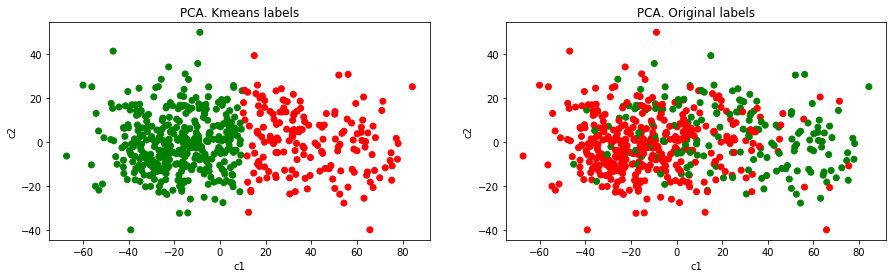

In [156]:
ax, bx = plot2D_clusters(pima_X_pca, kmeans_pima_pca.labels_, pima_Y, colors_pima)
ax.set_title('PCA. Kmeans labels')
bx.set_title('PCA. Original labels')
plt.show()

In [157]:
score_pca_kmeans_pima = len(np.where(kmeans_pima_pca.labels_ != pima_Y)[0])/m_pima
print('Kmeans accuracy with k = ' + str(k_clst_pima) + ' is ' + str(score_pca_kmeans_pima))

Kmeans accuracy with k = 2 is 0.7612781954887218


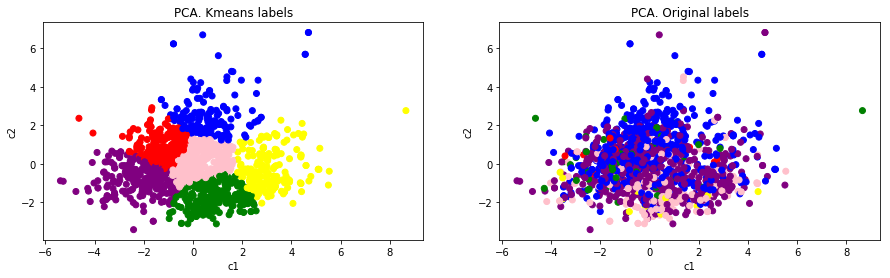

In [126]:
ax, bx = plot2D_clusters(wine_X_pca, kmeans_wine_pca.labels_, wine_Y, colors_wine)
ax.set_title('PCA. Kmeans labels')
bx.set_title('PCA. Original labels')
plt.show()

In [127]:
score_pca_kmeans_wine = len(np.where(kmeans_wine_pca.labels_ == wine_Y)[0])/m_wine
print('Kmeans accuracy with k = ' + str(k_clst_pima) + ' is ' + str(score_pca_kmeans_wine))

Kmeans accuracy with k = 2 is 0.1938711694809256


#### ICA
<u> kmeans </u>

In [128]:
pima_X_ica = pd.DataFrame(FastICA(n_components=2, max_iter=1000, tol=1e-2).fit_transform(pima_X),
                          columns = ['c1', 'c2'])
wine_X_ica = pd.DataFrame(FastICA(n_components=2, max_iter=1000, tol=1e-2).fit_transform(wine_X),
                          columns= ['c1', 'c2'])

kmeans_pima_ica = KMeans(n_clusters=k_clst_pima, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
               n_jobs=1, algorithm='auto').fit(pima_X_ica)
kmeans_wine_ica = KMeans(n_clusters=k_clst_wine, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
               n_jobs=1, algorithm='auto').fit(wine_X_ica)

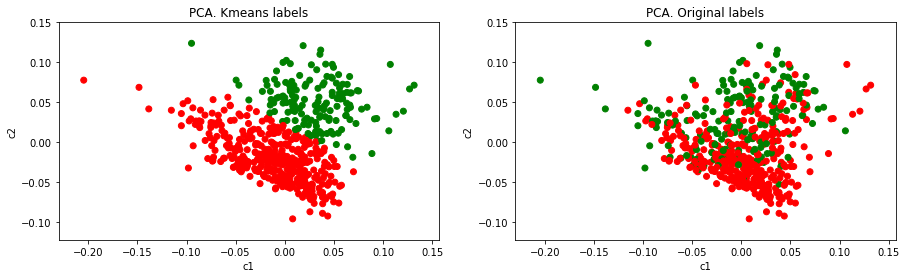

In [129]:
ax, bx = plot2D_clusters(pima_X_ica, kmeans_pima_ica.labels_, pima_Y, colors_pima)
ax.set_title('PCA. Kmeans labels')
bx.set_title('PCA. Original labels')
plt.show()

In [130]:
score_ica_kmeans_pima = len(np.where(kmeans_pima_ica.labels_ == pima_Y)[0])/m_pima
print('Kmeans accuracy with k = ' + str(k_clst_pima) + ' is ' + str(score_ica_kmeans_pima))

Kmeans accuracy with k = 2 is 0.693609022556391


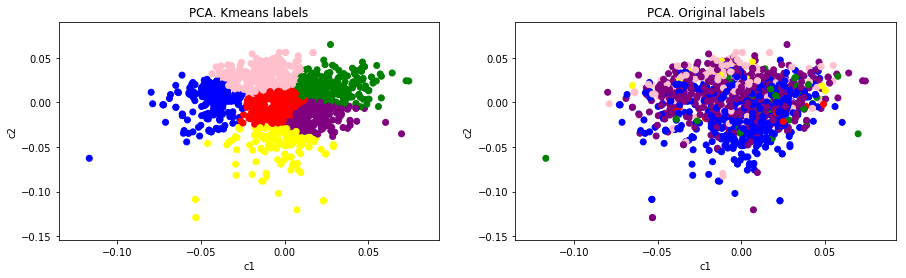

In [131]:
ax, bx = plot2D_clusters(wine_X_ica, kmeans_wine_ica.labels_, wine_Y, colors_wine)
ax.set_title('PCA. Kmeans labels')
bx.set_title('PCA. Original labels')
plt.show()

#### GRP
<u> kmeans </u>

In [170]:
pima_X_grp = pd.DataFrame(GaussianRandomProjection(n_components=2, random_state= 5).fit_transform(pima_X),
                          columns = ['c1', 'c2'])
wine_X_grp = pd.DataFrame(GaussianRandomProjection(n_components=2, random_state= 5).fit_transform(wine_X),
                          columns= ['c1', 'c2'])

kmeans_pima_grp = KMeans(n_clusters=k_clst_pima, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
               n_jobs=1, algorithm='auto').fit(pima_X_grp)
kmeans_wine_grp = KMeans(n_clusters=k_clst_wine, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
               n_jobs=1, algorithm='auto').fit(wine_X_grp)

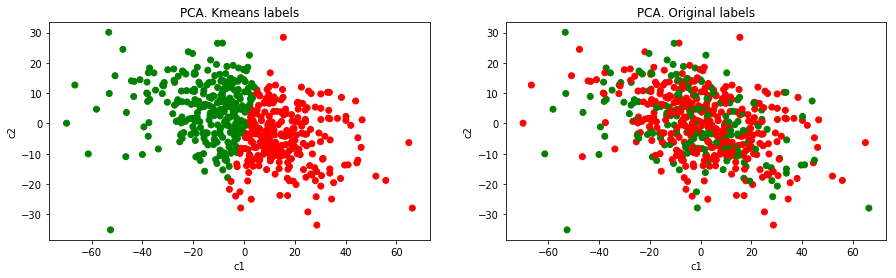

In [171]:
ax, bx = plot2D_clusters(pima_X_grp, kmeans_pima_grp.labels_, pima_Y, colors_pima)
ax.set_title('PCA. Kmeans labels')
bx.set_title('PCA. Original labels')
plt.show()

In [172]:
score_grp_kmeans_pima = len(np.where(kmeans_pima_grp.labels_ == pima_Y)[0])/m_pima
print('Kmeans accuracy with k = ' + str(k_clst_pima) + ' is ' + str(score_grp_kmeans_pima))

Kmeans accuracy with k = 2 is 0.518796992481203


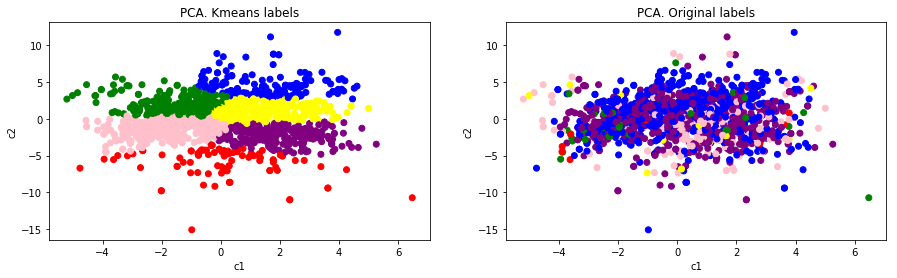

In [173]:
ax, bx = plot2D_clusters(wine_X_grp, kmeans_wine_grp.labels_, wine_Y, colors_wine)
ax.set_title('PCA. Kmeans labels')
bx.set_title('PCA. Original labels')
plt.show()

#### FA
<u> kmeans </u>

In [181]:
pima_X_fa = pd.DataFrame(FactorAnalysis(n_components=2, max_iter=1000, tol=1e-2).fit_transform(pima_X),
                          columns = ['c1', 'c2'])
wine_X_fa = pd.DataFrame(FactorAnalysis(n_components=2, max_iter=1000, tol=1e-2).fit_transform(wine_X),
                          columns= ['c1', 'c2'])

kmeans_pima_fa = KMeans(n_clusters=k_clst_pima, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
               n_jobs=1, algorithm='auto').fit(pima_X_fa)
kmeans_wine_fa = KMeans(n_clusters=k_clst_wine, init='k-means++', n_init=10, max_iter=300, tol=0.0001,
               precompute_distances='auto', verbose=0, random_state=None, copy_x=True,
               n_jobs=1, algorithm='auto').fit(wine_X_fa)

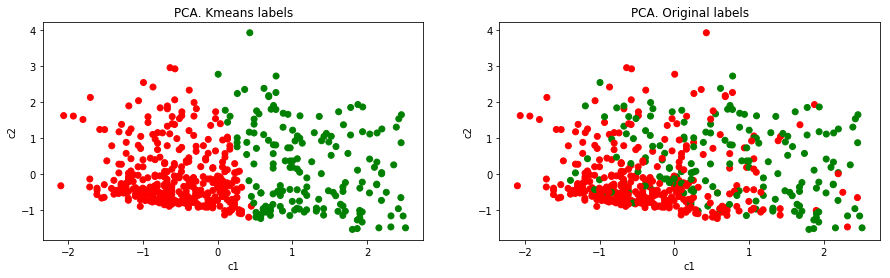

In [182]:
ax, bx = plot2D_clusters(pima_X_fa, kmeans_pima_fa.labels_, pima_Y, colors_pima)
ax.set_title('PCA. Kmeans labels')
bx.set_title('PCA. Original labels')
plt.show()

In [183]:
score_fa_kmeans_pima = len(np.where(kmeans_pima_fa.labels_ == pima_Y)[0])/m_pima
print('Kmeans accuracy with k = ' + str(k_clst_pima) + ' is ' + str(score_grp_kmeans_pima))

Kmeans accuracy with k = 2 is 0.518796992481203


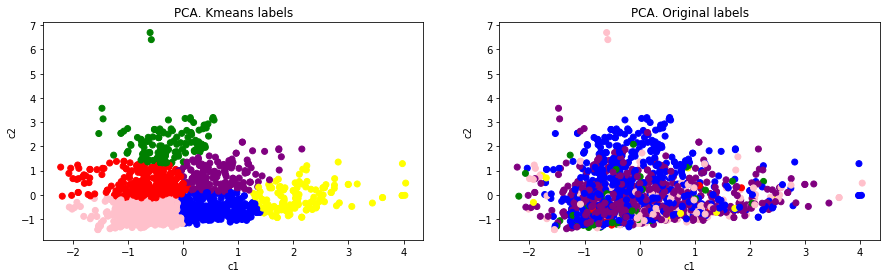

In [184]:
ax, bx = plot2D_clusters(wine_X_fa, kmeans_wine_fa.labels_, wine_Y, colors_wine)
ax.set_title('PCA. Kmeans labels')
bx.set_title('PCA. Original labels')
plt.show()

E.Maximisation